<a href="https://colab.research.google.com/github/WillDera/Stability_of_the_Grid_System/blob/master/Predicting_Stability_Of_Grid_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn.utils
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

# For our models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reading our dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# Checking if we have any null values in the dataset
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
# checking the dtypes of the columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
# dropping the stab column and getting our new dataset
df = df.drop(columns="stab", axis=1)
df.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable


In [6]:
# encoding the stabf column to 0 and 1 for our model to be able to take in the data.
new_df = df
new_df.stabf = new_df.stabf.map(dict(unstable=1, stable=0))

# Checking our dataset to be sure it looks just how we want it.
new_df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0


In [7]:
# preprocessing
X = new_df.drop(columns='stabf', axis=1)
y = new_df["stabf"]

In [8]:
# Standardizing the data
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Splitting our dataset into train and test sets (80% and 20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

# **Training Models**

**Random Forest Classifier**

In [10]:
rf_clf = RandomForestClassifier(random_state = 1)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Extra Trees Classifier**

In [11]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [12]:
# We're going to use RandomizedSearchCV to find the optimal parameters for our model
from sklearn.model_selection import RandomizedSearchCV

In [38]:
model = ExtraTreesClassifier(random_state=1)
extree_clf = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
extree_clf.fit(x_train, y_train)

print("\n The best estimator across ALL searched params:\n", extree_clf.best_estimator_)
print("\n The best score across ALL searched params:", extree_clf.best_score_)
print("\n The best parameters across ALL searched params:\n", extree_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished



 The best estimator across ALL searched params:
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

 The best score across ALL searched params: 0.92675

 The best parameters across ALL searched params:
 {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': None}


Training a second model with the provided parameters

In [42]:
extree_clf2 = ExtraTreesClassifier(n_estimators=500, min_samples_split=3, min_samples_leaf=4, max_features=None, random_state=1)
extree_clf2.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

**XGBoost Classifier**

In [14]:
xgbc_clf = XGBClassifier(random_state=1)
xgbc_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Lightgbm Classifier**

In [15]:
lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# **Model Evaluation**

In [26]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

***Evaluation: Random Forest***

In [17]:
# confusion matrix for our random forest classifier
rf_pred = cross_val_predict(rf_clf, x_train, y_train, cv=10)
cm = confusion_matrix(y_train, rf_pred)
cm

array([[2497,  411],
       [ 229, 4863]])

In [18]:
# getting the precision, recall and f1 scores of our Random Forest classifier
print("Random Forest Classifier: \n")
print("Accuracy: ", accuracy_score(y_train, rf_pred)*100)
print("Precision: ", precision_score(y_train, rf_pred)*100)
print("Recall: ", recall_score(y_train, rf_pred)*100)
print("F1-score: ", f1_score(y_train, rf_pred)*100)

Random Forest Classifier: 

Accuracy:  92.0
Precision:  92.20705346985211
Recall:  95.50274941084054
F1-score:  93.8259695157245


***Evaluation: Extra Trees Classifier***

In [19]:
# confusion matrix for our Extra Trees classifier
extree_pred = cross_val_predict(extree_clf, x_train, y_train, cv=10)
cm = confusion_matrix(y_train, extree_pred)
cm

array([[2526,  382],
       [ 198, 4894]])

In [20]:
# getting the precision, recall and f1 scores of our Extra Trees classifier
print("Extra Trees Classifier: \n")
print("Accuracy: ", accuracy_score(y_train, extree_pred)*100)
print("Precision: ", precision_score(y_train, extree_pred)*100)
print("Recall: ", recall_score(y_train, extree_pred)*100)
print("F1-score: ", f1_score(y_train, extree_pred)*100)

Extra Trees Classifier: 

Accuracy:  92.75
Precision:  92.75966641394996
Recall:  96.11154752553024
F1-score:  94.40586419753086


**Getting the accuracy for our second Extra Trees Classifier**

In [43]:
# confusion matrix for our Extra Trees classifier
extree_pred2 = cross_val_predict(extree_clf2, x_train, y_train, cv=10)
cm = confusion_matrix(y_train, extree_pred2)
cm

array([[2528,  380],
       [ 203, 4889]])

In [44]:
# getting the precision, recall and f1 scores of our Extra Trees classifier
print("Extra Trees Classifier: \n")
print("Accuracy: ", accuracy_score(y_train, extree_pred2)*100)
print("Precision: ", precision_score(y_train, extree_pred2)*100)
print("Recall: ", recall_score(y_train, extree_pred2)*100)
print("F1-score: ", f1_score(y_train, extree_pred2)*100)

Extra Trees Classifier: 

Accuracy:  92.71249999999999
Precision:  92.78800531410135
Recall:  96.01335428122545
F1-score:  94.3731300067561


***Evaluation: XGBoost Classifier***

In [21]:
# confusion matrix for our XGBoost classifier
xgbc_pred = cross_val_predict(xgbc_clf, x_train, y_train, cv=10)
cm = confusion_matrix(y_train, xgbc_pred)
cm

array([[2467,  441],
       [ 194, 4898]])

In [22]:
# getting the precision, recall and f1 scores of our XGBoost classifier
print("XGBoost Classifier: \n")
print("Accuracy: ", accuracy_score(y_train, xgbc_pred)*100)
print("Precision: ", precision_score(y_train, xgbc_pred)*100)
print("Recall: ", recall_score(y_train, xgbc_pred)*100)
print("F1-score: ", f1_score(y_train, xgbc_pred)*100)

XGBoost Classifier: 

Accuracy:  92.0625
Precision:  91.74002622213898
Recall:  96.19010212097407
F1-score:  93.9123765698399


***Evaluation: LightGBM Classifier***

In [23]:
# confusion matrix for our LightGBM classifier
lgbm_pred = cross_val_predict(lgbm_clf, x_train, y_train, cv=10)
cm = confusion_matrix(y_train, lgbm_pred)
cm

array([[2634,  274],
       [ 193, 4899]])

In [24]:
# getting the precision, recall and f1 scores of our LightGBM classifier
print("LightGBM Classifier: \n")
print("Accuracy: ", accuracy_score(y_train, lgbm_pred)*100)
print("Precision: ", precision_score(y_train, lgbm_pred)*100)
print("Recall: ", recall_score(y_train, lgbm_pred)*100)
print("F1-score: ", f1_score(y_train, lgbm_pred)*100)

LightGBM Classifier: 

Accuracy:  94.16250000000001
Precision:  94.70326696307751
Recall:  96.20974076983504
F1-score:  95.45056015586945


**Getting accuracy of our models on the testset**

In [32]:
rf_pred_predictions = rf_clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, rf_pred_predictions))

Accuracy:  0.929


In [33]:
xgbc_pred_predictions = xgbc_clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, xgbc_pred_predictions))

Accuracy:  0.9195


In [34]:
lgbm_pred_predictions = lgbm_clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, lgbm_pred_predictions))

Accuracy:  0.9475


**Plotting a graph of feature importance for our Extra Trees classifier**

Feature ranking:
1. feature 1 (0.135057)
2. feature 0 (0.133123)
3. feature 3 (0.130239)
4. feature 2 (0.130151)
5. feature 10 (0.111799)
6. feature 11 (0.108436)
7. feature 9 (0.107800)
8. feature 8 (0.102993)
9. feature 6 (0.010956)
10. feature 5 (0.010876)
11. feature 7 (0.010288)
12. feature 4 (0.008284)


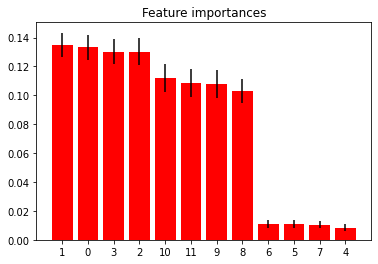

In [46]:
import matplotlib.pyplot as plt
importances = extree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in extree_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()